# Exploratory Data Analysis - Retail
> TSF:GRIP Data Science & Business Analytics Task By: Aimen Baig

**task:** As a business manager, try to find out the weak areas where you can work to make more profit? What all business problems you can derive by exploring the data?
 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv


This task will extractdata. Appropriate preprocessing will be done and data exploration will be performed on the data. 
Following the purpose of this task, the primary focus will be on profit-related factors, which are the attributes 'Sales' and 'Profit' in American Dollars (USD) measurements, as well as the integer value of 'Quantity' and percentage values of 'Discount' for each sales transaction. Analysing these will help to identify and assess concern areas.

# 1. Data Collection
We will import the data look into it's type, and dive into the meaning of every attribute

In [2]:
# import data
df = pd.read_csv('../input/sample-supermarket-dataset/SampleSuperstore.csv')
df.head()
# show first 5 records

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# checking the type of data
type(df)

pandas.core.frame.DataFrame

In [4]:
# column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

 Regarding the attributes included in SampleSuperstore dataset
*  'Ship Mode' is the method of shipping the physical goods and products to the intended customers
*  'Segment' specifies the customer segment or marketing groups according to their interests and demographics
*  'Country' is all in the United States of America (USA), 
*  'City' refers to the cities in USA
* 'State' is made up of the states in USA,
*  'Postal Code' denotes the postal destination address sorted by the regions in USA 
* 'Region' Country region
* 'Category' consists of the named groups of similar and defined physical products
* 'Sub-Category' lists the subdivisions with respect to a given category
* 'Sales' are the monetary value of transactions between the Superstore and its customers of physical goods in American Dollars (USD$) measurements
* 'Quantity' records the number of such products in each sales transaction
* 'Discount' states the percentage of monetary deduction from the usual product price
* 'Profit' is the financial gains in USD from each transaction.

# Data Preprocessing


Now we will convert the raw data into understandable format and we'll focus on 4 steps:
1. Data cleaning: null values within the dataset will be identified, and appropriately replaced if possible,then we will check for typos or inconsistent capitalization of records in columns


In [5]:
#checking for null values and attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<AxesSubplot:>

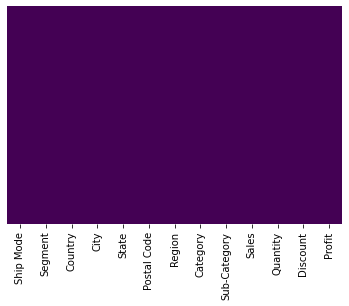

In [6]:
#representing missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From above output, we can see that:
* there are no null values.
* We have 8 categorical attributes
* We have two quantitative discrete integers attributes i.e. Postal Code and Quantity 
* 3 quantitative continuous numerical floats with 64 digit placings

In [7]:
#checking for unique categories in object type attributes (categorical)
catagorical_features = [i for i in df.columns if df.dtypes[i] == 'object']
for j in catagorical_features:
    print('\033[1m' + j + '\033[0m')
    print(sorted(df[j].unique())) # sort in alphabetical order

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

In [8]:
#df.apply(pd.Series.value_counts)


By looking at the  above output,there are no Typos, Repetitive entries or any structural errors(inconsistent capitalization or mislabeled columns) in the data.

Now we shall observe the unique value counts ahead

In [9]:
# count of unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

above we also see that the "Country" column has only one category, this is not gonna take any parts in generating patterns therefore, we'll consider to drop it in future in our data reduction step

Up next, we are gonna try to detect the outliers in the dataset by looking in to the histograms of the numerical attributes.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


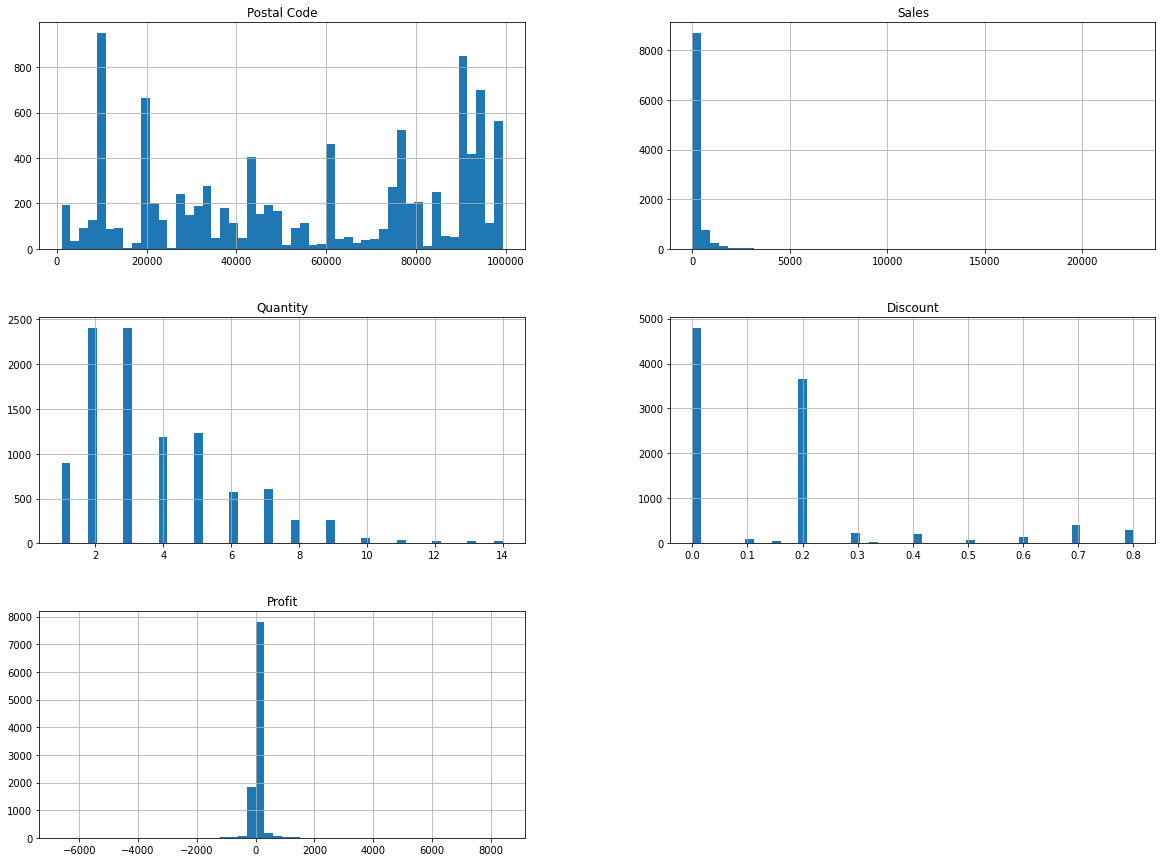

In [10]:
#matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()


The values are resonable and lie within an expected range hence there are no outliers to connsider specifically

Now we are going to handle the duplicate entries in our data set.
> Duplicated rows or records can now by dropped from the dataset, as this redundancy may cause inaccurate results and outcomes (an assumption on the dataset).

In [11]:
# detect duplicated records
df[df.duplicated(subset = None, keep = False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [12]:
# drop duplicated records, retain only one copy for each
df = pd.DataFrame.drop_duplicates(df)
df.shape
# 9977 unique records for 12 attributes shown below


(9977, 13)

**Data reduction:** Data reduction involves dropping the attribute ‘Country’ through attribute dimensionality reduction, since it is containing 100% exact same values of "United States" for all records. 'Postal Code' is also dropped since this attribute is useless when we're interested in profit.

In [13]:
# drop Country
df = df.drop(['Country'], axis = 1)
df = df.drop(['Postal Code'], axis = 1)

Up next, we're going to observe some correlations ahead
> A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

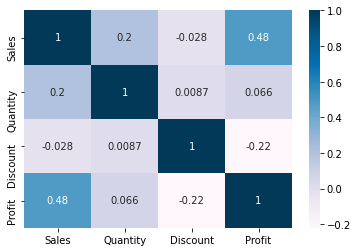

In [14]:
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

In this case, the only predictors i will consider to  drop will be if their intercorrelations are above 0.95 and almost perfect descriptions of each other. It would be a cause of "redundancy" to include both of them. Therefore, no attributes were removed. no multicollinearity was found.

finally the preprocessing is complete :

In [15]:
# display the number of entries, the number and names of the column attributes, the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


# EDA
Now after complete preprocessing, we will analyse the data 

The Summary statistics:

In [16]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [17]:
# total Sales
round(sum(df['Sales']), 2)


2296195.59

In [18]:
# total Quantity sold
sum(df['Quantity'])

37820

In [19]:
# total Profit
round(sum(df['Profit']), 2)

286241.42

Firstly, the total sales is USD2296195.59 ,  USD230.148902 average for every transaction. it's minimum value is USD0.4444000 and maximum is USD22638.48.
The total Quantity sold was 37820 of products, with an average of 4 being sold throughout the individual transactions. the range of product sold starts from 1 to 14
Average discount was 16% for each transaction. This can range from no discount to a  highest discount of 80% for an individual transaction.

The Superstore made a total profit of USD28,6241.42, and USD28.69 on average for each transaction. However, this can range from a loss of USD6,599.98 to a profit of USD8,399.98 for an individual transaction.



Now, we're gong to use kernel density curves for visualising the distributions of both sales and profit in a form of continous probability density curve. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


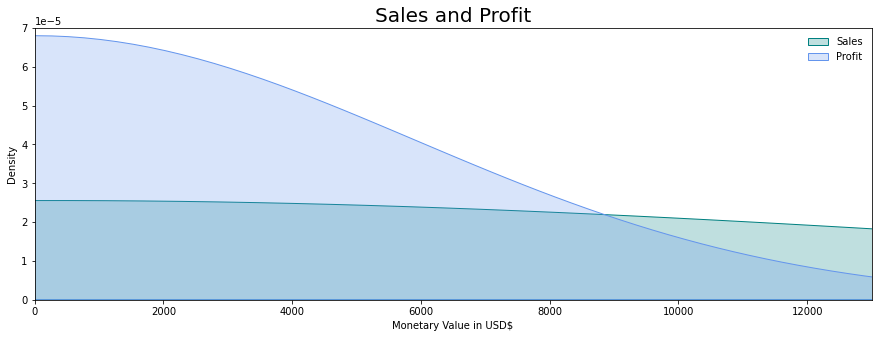

In [20]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([0, 13000])
plt.ylim([0, 0.00007])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


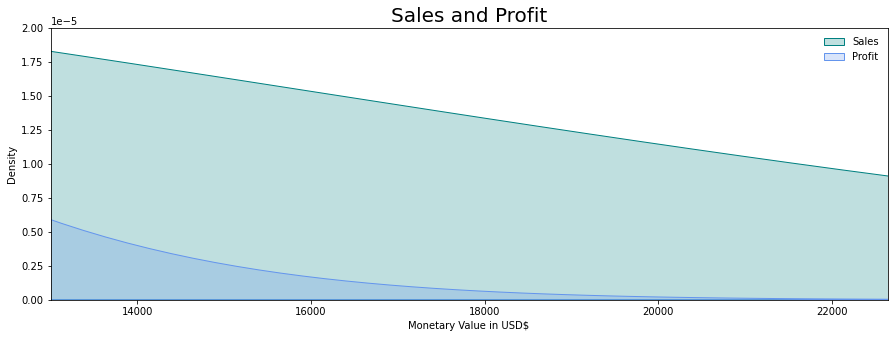

In [21]:
plt.figure(figsize = (15, 5))
# plot Sales and Profit for comparisons
sns.kdeplot(df['Sales'], color = 'Teal', label = 'Sales', shade = True, bw = 25)
sns.kdeplot(df['Profit'], color = 'Cornflowerblue', label = 'Profit', shade = True, bw = 25)
plt.xlim([13000, 22640])
plt.ylim([0, 0.00002])
plt.ylabel('Density')
plt.xlabel('Monetary Value in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.legend(loc = 'upper right', frameon = False) 
plt.show()

In above plots, the profit values are mostly above than the sales. Which shows good business of the superstore. But sales above USD 8500 are having decreased profits and they are the areas where the improvement is needed.

next, we're going to observe some Pearson correlations

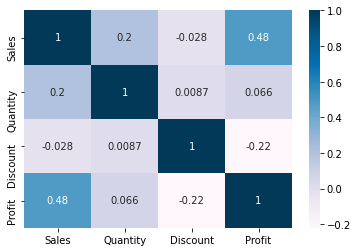

In [22]:
 # correlation matrix
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

Sales and Profit have a moderate positive linear correlation indicating good business. Discount and Profit have a weak negative linear correlation which means the discounts that were given to increase the profits were causing a negative impact on the profit( it might be bacause of the bad quality products etc or maybe the consumers  find it suspicious that the discounts are given ). Quantity and Profit have little to no linear correlation i.e when increasing quantity it has little to no effect on the profit maybe because superstore might have promotional strageties of buy one get one etc. similarly with increasing discounts the customers were not likely to buy the product hence resulting in a negative correlation. 

now for the categorical attributes:

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

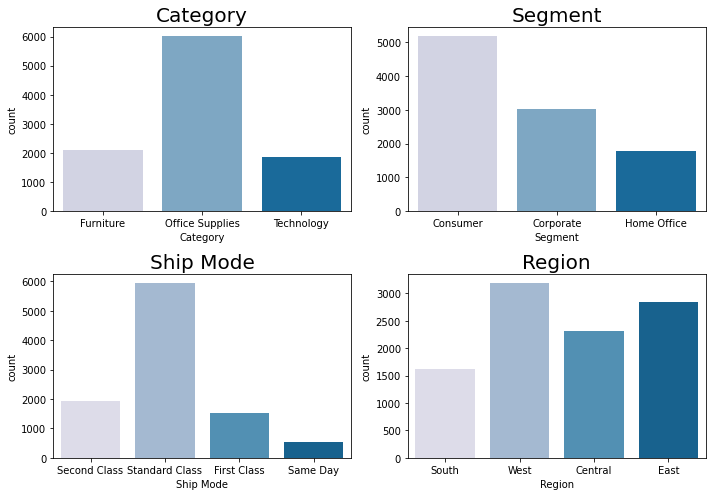

In [23]:
# count of each Category, Segment, Ship Mode, and Region
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
sns.countplot(df['Category'], ax = axs[0][0], palette = 'PuBu')
sns.countplot(df['Segment'], ax = axs[0][1], palette = 'PuBu')
sns.countplot(df['Ship Mode'], ax = axs[1][0], palette = 'PuBu')
sns.countplot(df['Region'], ax = axs[1][1], palette = 'PuBu')
axs[0][0].set_title('Category', fontsize = 20)
axs[0][1].set_title('Segment', fontsize = 20)
axs[1][0].set_title('Ship Mode', fontsize = 20)
axs[1][1].set_title('Region', fontsize = 20)
plt.tight_layout()

now we're going to make a scatterplot to observe the spread of datapoints betwen sales and profit.

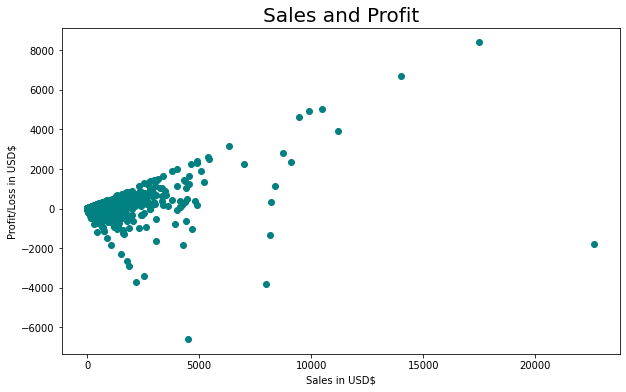

In [24]:
fig, ax = plt.subplots(figsize = (10, 6))
# scatterplot of Sales and Profit
ax.scatter(df["Sales"] , df["Profit"], color = 'Teal')
ax.set_xlabel('Sales in USD$')
ax.set_ylabel('Profit/Loss in USD$')
plt.title('Sales and Profit', fontsize = 20)
plt.show()

Most of the sales were made under 5k, individuals who were from the "consumer segment" as we seen above were likely to buy goods that were less in making profits. 

Sales under USD2500 were in loss maybe because of the discounted products which decreased the overall revenue.

Sales above USD5000 were hugely profitable. 

Now We're going to dive into the state wise analysis: 
1. We're going to see the sales in every state
2. We're going to see the profits generated in every state
3. We're going to give the discounts given off in every state

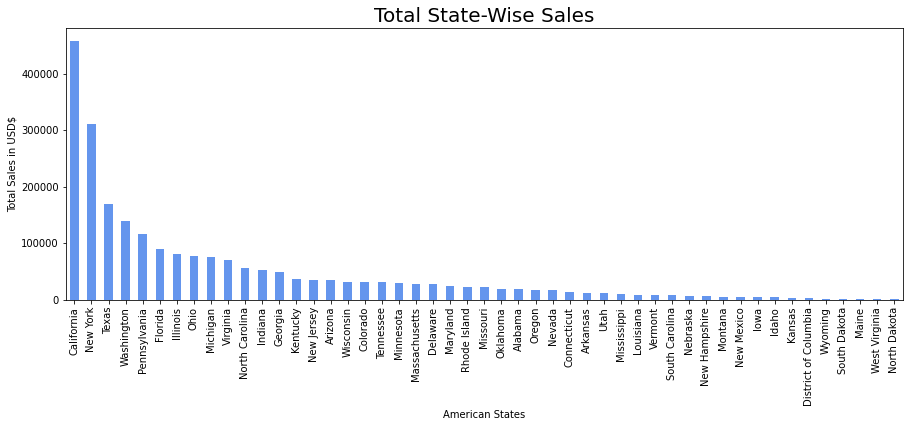

In [25]:
# total Sales for each State
df_state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                            color = 'Cornflowerblue')
plt.ylabel('Total Sales in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Sales', fontsize = 20)
plt.show()

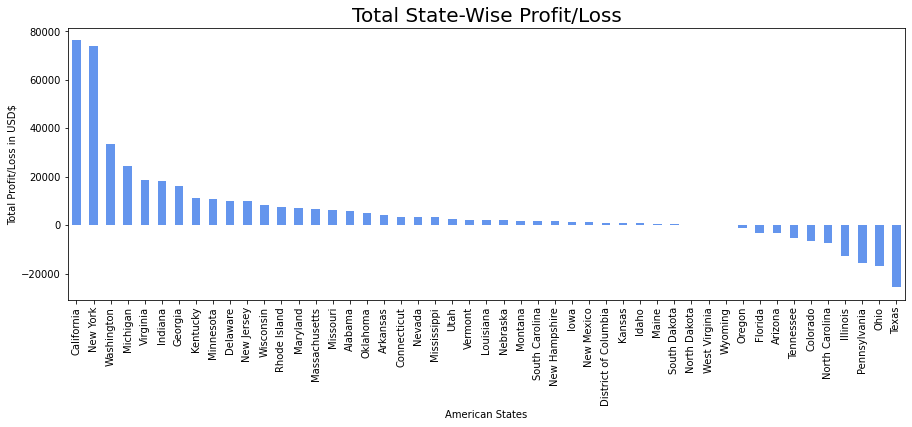

In [26]:
# total Profit for each State
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

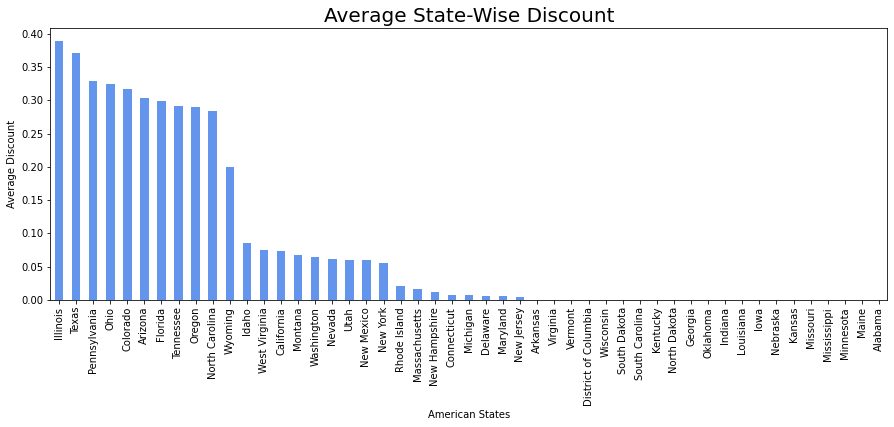

In [27]:
# average Discount for each State
df_state_profit = df.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5), 
                                                                                                 color = 'Cornflowerblue')
plt.ylabel('Average Discount')
plt.xlabel('American States')
plt.title('Average State-Wise Discount', fontsize = 20)
plt.show()

California and New York are the top 2 places, with higher  profits of around USD 75k.


Texas, despite having the third highest sales, suffered the highest loss of around USD25k. This may be because it has the second highest discount level. Superstore is advised to reduce discount levels in Texas, and instead switch to other promotional strategies, in order to minimise losses.

Pennsylvania, Illinois, and Ohio are the third, first, and fourth state offering larger discounts respectively, and this may be the reason behind them resulting in the third, fourth, and second biggest loss of around USD15k. Superstore is advised to switch to giving less discounts.

California gives out considerably lower discounts, which may be one of the reasons behind it being top in sales and profit. This is indicative that the promotional strategy of offering less discounts is highly effective in the state of California.

More than half the states make little to no profit, and a significant number of these even suffer from loss.

A majority of states offer  discounts under 10%.

now we're going to see some subcategories and their profit/loss

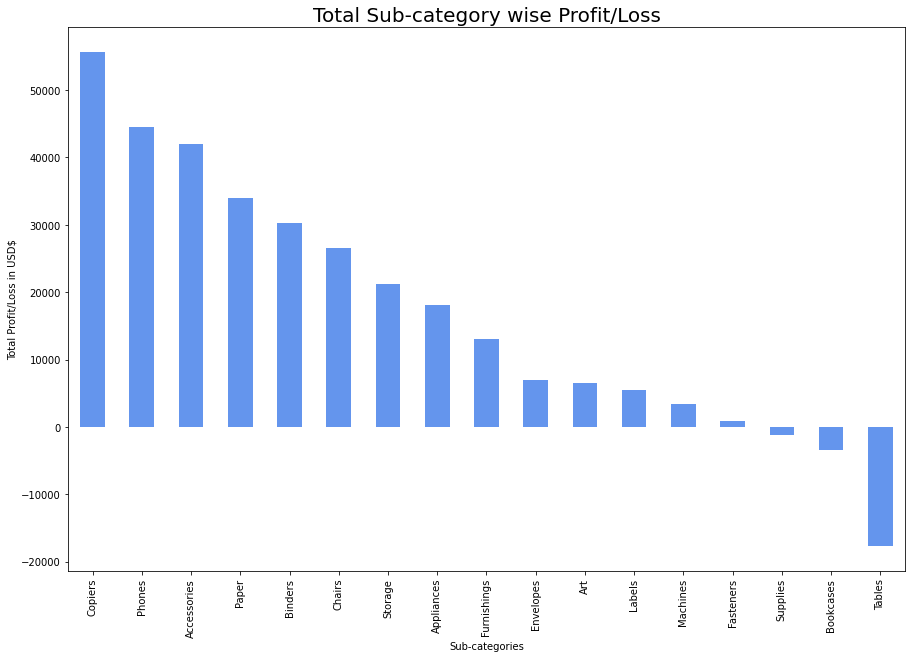

In [28]:
# total Profit for each State
df_state_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 10), 
                                                                                              color = 'Cornflowerblue')
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('Sub-categories')
plt.title('Total Sub-category wise Profit/Loss', fontsize = 20)
plt.show()

it is shown that the profit made of tables resulted in a great loss including bookcases and fasteners, Superstore is advised to make some price adjustments on these items. Technology based items have gained a good profit whereas binders and papers which are some products that are bought often produces good profit.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


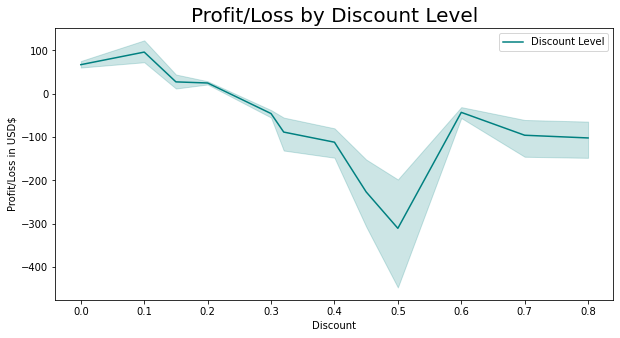

In [29]:

plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = df, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

losses will  occur for higher discount levels above 20%. In other words, between 0% and 20% of discounts, a profit can be made by reducing discounts. As discussed before, higher discounts likely also cause suspicion in consumer, instead to implement discounts as a promotional strategy to successfully increase sales. A considerable number of customers may develop the thinking that Superstore's products are defective or low quality. In a long run, this can negatively affect Superstore's brand image. All in all, Superstore is advised to consider other promotional strategies. To put on better advertisments and marketing stageties;

The worst losses occured when discount approximates 50%. This may indicate festivals, end-of-season sales, and clearance sales for older designs.

Superstore is most profitable when discount levels lower than 10% are offered. This allows less occurences of lowered prices after discount deductions, and thus larger profit margins and profits.

thank you !